In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.fft as fft

from sklearn.model_selection import train_test_split


from hmmlearn import hmm

np.random.seed(46)

<function matplotlib.pyplot.show(*args, **kw)>

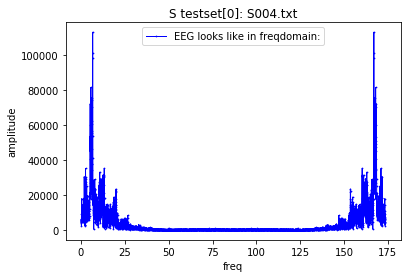

In [10]:
#Read EEG dataset
from os import listdir
# Z: normal but with eyes open
datapath_Z = 'dataset/EEG/Z' 
# O: normal but with eyes closed
datapath_O = 'dataset/EEG/O'
# S: ictal state and contains seizure activities
datapath_S = 'dataset/EEG/S'
# N: hippocampal formation of the opposite brain hemisphere
datapath_N = 'dataset/EEG/N'
# F: epileptogenic zone
datapath_F = 'dataset/EEG/F'

files_Z = [f for f in listdir(datapath_Z)]
files_O = [f for f in listdir(datapath_O)]
files_S = [f for f in listdir(datapath_S)]
files_N = [f for f in listdir(datapath_N)]
files_F = [f for f in listdir(datapath_F)]

Z_train, Z_test = train_test_split(
    files_Z, test_size = 0.3)

S_train, S_test = train_test_split(
    files_S, test_size = 0.3)

data_Z_train = abs(fft.fft(np.loadtxt(datapath_Z + '/' + Z_train[0])))[1:]
data_Z_train_len = [len(data_Z_train)]
for file in Z_train:
    data_file = abs(fft.fft(np.loadtxt(datapath_Z + '/' + file)))[1:]
    data_Z_train = np.concatenate([data_Z_train, data_file])
    data_Z_train_len.append(len(data_file))

data_len = len(np.loadtxt(datapath_Z + '/' + Z_train[0]) - 1)
plt.plot(173.61/data_len * np.arange(1, data_len), abs(fft.fft(np.loadtxt(datapath_Z + '/' + Z_train[0])))[1:], ".-", label="EEG looks like in freqdomain:", color = 'b',linewidth = 1, markersize = 1.5)
plt.xlabel("freq")
plt.ylabel("amplitude")
#plt.yscale("symlog")
plt.title("Z trainset[0]:"+ Z_train[0])
plt.savefig('Z_1.png', dpi=2000)
plt.legend()
plt.show

data_Z_test = abs(fft.fft(np.loadtxt(datapath_Z + '/' + Z_test[0])))[1:]
data_Z_test_len = [len(data_Z_test)]
for file in Z_test:
    data_file = abs(fft.fft(np.loadtxt(datapath_Z + '/' + file)))[1:]
    data_Z_test = np.concatenate([data_Z_test, data_file])
    data_Z_test_len.append(len(data_file))
    
data_S_test = abs(fft.fft(np.loadtxt(datapath_S + '/' + S_test[0])))[1:]
data_S_test_len = [len(data_S_test)]
for file in S_test:
    data_file = abs(fft.fft(np.loadtxt(datapath_S + '/' + file)))[1:]
    data_S_test = np.concatenate([data_S_test, data_file])
    data_S_test_len.append(len(data_file))

plt.cla()
data_len = len(np.loadtxt(datapath_S + '/' + S_test[0])-1)
plt.plot(173.61/data_len * np.arange(1, data_len), abs(fft.fft(np.loadtxt(datapath_S + '/' + S_test[0])))[1:], ".-", label="EEG looks like in freqdomain:", color = 'b',linewidth = 1, markersize = 1.5)
plt.xlabel("freq")
plt.ylabel("amplitude")
#plt.yscale("symlog")
plt.title("S testset[0]: "+ S_test[0])
plt.savefig('S_1.png', dpi=2000)
plt.legend()
plt.show
#test_data = np.concatenate([data_Z_test, data_S_test])
#test_data_len = np.concatenate([data_Z_test_len, data_S_test_len])

In [11]:
#train hmm for EEG dataset 
EEG_HMM = hmm.GMMHMM(n_components=4, n_mix=10, covariance_type='diag')
EEG_HMM.fit(data_Z_train.reshape(-1,1), lengths = data_Z_train_len)

GMMHMM(algorithm='viterbi', covariance_type='diag',
       covars_prior=array([[[-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5]],

       [[-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5]],

       [[-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5]],

       [[-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],
        [-1.5],...
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
       min_covar=0.001, n_components=4, n_iter=10, n_mix=10, params='stmcw',
       random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
       verbose=False,
       weights_prio

In [12]:
score_Z = []
score_S = []
for i in range(len(Z_test)):
    data = data_Z_test[i * data_Z_test_len[i] : (i + 1) * data_Z_test_len[i]]
    score_Z.append(EEG_HMM.score(data.reshape(-1, 1)))
    # print(EGG_HMM.score(data.reshape(-1, 1)))
#print("---------------")
for i in range(len(S_test)):
    data = data_S_test[i * data_S_test_len[i] : (i + 1) * data_S_test_len[i]]
    score_S.append(EEG_HMM.score(data.reshape(-1, 1)))
    # print(EGG_HMM.score(data.reshape(-1, 1)))

<function matplotlib.pyplot.show(*args, **kw)>

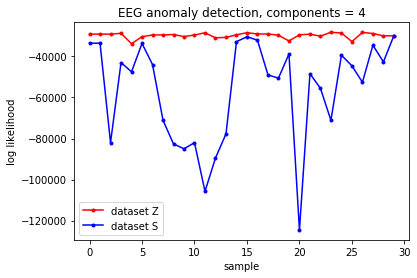

In [13]:
plt.plot(score_Z[:], ".-", label="dataset Z", color = 'r')
plt.plot(score_S[:], ".-", label="dataset S", color = 'b')
plt.xlabel("sample")
plt.ylabel("log likelihood")
#plt.yscale("symlog")
plt.title("EEG anomaly detection, components = 4")
plt.legend()
plt.savefig('EEGscore.png', dpi=2000)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

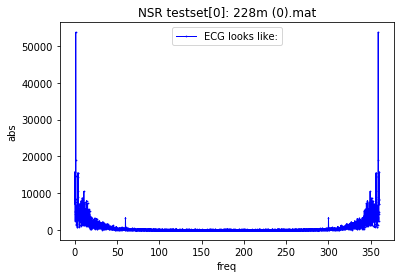

In [21]:
# Read ECG dataset
# take normal sinus rhythm (NSR) [normal] and Atrial fibrillation (AFib) [anomaly] as example
from os import listdir
datapath_NSR = 'dataset/MLII/1 NSR' 
datapath_AFib = 'dataset/MLII/4 AFIB'
# Premature ventricular contraction [anomaly]
datapath_PVC = 'dataset/MLII/7 PVC'

files_NSR = [f for f in listdir(datapath_NSR)]
files_AFib = [f for f in listdir(datapath_AFib)]
files_PVC = [f for f in listdir(datapath_PVC)]

NSR_train, NSR_test = train_test_split(
    files_NSR, test_size = 0.3)

AFib_train, AFib_test = train_test_split(
    files_AFib, test_size = 0.3)

PVC_train, PVC_test = train_test_split(
    files_PVC, test_size = 0.3)

data_NSR_train = abs(fft.fft(sio.loadmat(datapath_NSR + '/' + NSR_train[0])['val'][0]))[1:] 
data_NSR_train_len = [len(data_NSR_train)]

for file in NSR_train:
    data_file = abs(fft.fft(sio.loadmat(datapath_NSR + '/' + file)['val'][0]))[1:]
    data_NSR_train = np.concatenate([data_NSR_train, data_file])
    data_NSR_train_len.append(len(data_file))

data_len = len(sio.loadmat(datapath_NSR + '/' + NSR_train[0])['val'][0])
plt.plot(360/data_len * np.arange(1, data_len), abs(fft.fft(sio.loadmat(datapath_NSR + '/' + NSR_train[0])['val'][0]))[1:], ".-", label="ECG looks like:", color = 'b',linewidth = 1, markersize = 1.5)
plt.xlabel("freq")
plt.ylabel("abs")
#plt.yscale("symlog")
plt.title("ECG trainset[0]:"+ NSR_train[0])
plt.savefig('NSR_1.png', dpi=2000)
plt.legend()
plt.show

plt.cla()
plt.plot(360/data_len * np.arange(1, data_len), abs(fft.fft(sio.loadmat(datapath_NSR + '/' + NSR_train[1])['val'][0]))[1:], ".-", label="ECG looks like:", color = 'b',linewidth = 1, markersize = 1.5)
plt.xlabel("freq")
plt.ylabel("abs")
#plt.yscale("symlog")
plt.title("ECG trainset[1]:"+ NSR_train[1])
plt.savefig('NSR_2.png', dpi=2000)
plt.legend()
plt.show


data_NSR_test = abs(fft.fft(sio.loadmat(datapath_NSR + '/' + NSR_test[0])['val'][0]))[1:]
data_NSR_test_len = [len(data_NSR_test)]
for file in NSR_test:
    data_file = abs(fft.fft(sio.loadmat(datapath_NSR + '/' + file)['val'][0]))[1:]
    data_NSR_test = np.concatenate([data_NSR_test, data_file])
    data_NSR_test_len.append(len(data_file))
    
data_AFib_test = abs(fft.fft(sio.loadmat(datapath_AFib + '/' + AFib_test[0])['val'][0]))[1:]
data_AFib_test_len = [len(data_AFib_test)]
for file in AFib_test:
    data_file = abs(fft.fft(sio.loadmat(datapath_AFib + '/' + file)['val'][0]))[1:]
    data_AFib_test = np.concatenate([data_AFib_test, data_file])
    data_AFib_test_len.append(len(data_file))

plt.cla()

plt.plot(360/data_len * np.arange(1, data_len), abs(fft.fft(sio.loadmat(datapath_AFib + '/' + AFib_test[0])['val'][0]))[1:], ".-", label="ECG looks like:", color = 'b',linewidth = 1, markersize = 1.5)
plt.xlabel("freq")
plt.ylabel("abs")
#plt.yscale("symlog")
plt.title("Afib testset[0]: "+ AFib_test[0])
plt.savefig('Afib_1.png', dpi=2000)
plt.legend()
plt.show

data_PVC_test = abs(fft.fft(sio.loadmat(datapath_PVC + '/' + PVC_test[0])['val'][0]))[1:]
data_PVC_test_len = [len(data_PVC_test)]
for file in PVC_test:
    data_file = abs(fft.fft(sio.loadmat(datapath_PVC + '/' + file)['val'][0]))[1:]
    data_PVC_test = np.concatenate([data_PVC_test, data_file])
    data_PVC_test_len.append(len(data_file))
#test_data = np.concatenate([data_NSR_test, data_AFib_test])
#test_data_len = np.concatenate([data_NSR_test_len, data_AFib_test_len])
plt.cla()

#plt.plot(sio.loadmat(datapath_NSR + '/' + NSR_train[0])['val'][0][1:] - sio.loadmat(datapath_NSR + '/' + NSR_train[0])['val'][0][:-1], ".-", label="ECG looks like:", color = 'b',linewidth = 1, markersize = 1.5)
plt.plot(360/data_len * np.arange(1, data_len), abs(fft.fft(sio.loadmat(datapath_NSR + '/' + NSR_train[27])['val'][0]))[1:], ".-", label="ECG looks like:", color = 'b',linewidth = 1, markersize = 1.5)
#plt.plot(sio.loadmat(datapath_NSR + '/' + NSR_train[27])['val'][0], ".-", label="ECG looks like:", color = 'r',linewidth = 1, markersize = 1.5)
#plt.plot(sio.loadmat(datapath_NSR + '/' + NSR_train[2])['val'][0][1:] - sio.loadmat(datapath_NSR + '/' + NSR_train[2])['val'][0][:-1], ".-", label="ECG looks like:", color = 'g',linewidth = 1, markersize = 1.5)


plt.xlabel("freq")
plt.ylabel("abs")
#plt.yscale("symlog")
plt.title("NSR testset[0]: "+ NSR_train[27])
plt.savefig('PVC_1.png', dpi=2000)
plt.legend()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

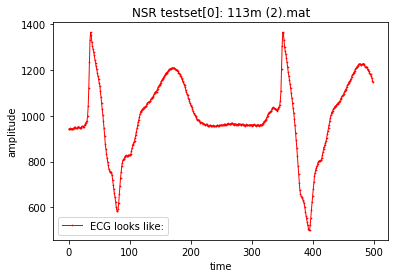

In [7]:
#plt.hist(data_NSR_test, bins = [i for i in range(-200,200,1)])
#plt.show
#print(sio.loadmat(datapath_NSR + '/' + NSR_train[0])['val'][0][1:] - sio.loadmat(datapath_NSR + '/' + NSR_train[0])['val'][0][:-1])
#plt.plot(sio.loadmat(datapath_NSR + '/' + NSR_train[0])['val'][0][1:] - sio.loadmat(datapath_NSR + '/' + NSR_train[0])['val'][0][:-1], ".-", label="ECG looks like:", color = 'b',linewidth = 1, markersize = 1.5)
#plt.plot(sio.loadmat(datapath_NSR + '/' + NSR_train[37])['val'][0][1:] - sio.loadmat(datapath_NSR + '/' + NSR_train[37])['val'][0][:-1], ".-", label="ECG looks like:", color = 'r',linewidth = 1, markersize = 1.5)
#plt.plot(sio.loadmat(datapath_NSR + '/' + NSR_train[37])['val'][0],".-", label="ECG looks like:", color = 'r',linewidth = 1, markersize = 1.5)
#plt.plot(sio.loadmat(datapath_NSR + '/' + NSR_train[2])['val'][0][1:] - sio.loadmat(datapath_NSR + '/' + NSR_train[2])['val'][0][:-1], ".-", label="ECG looks like:", color = 'g',linewidth = 1, markersize = 1.5)

plt.plot(sio.loadmat('./dataset/MLII/17 PR/107m (6).mat')['val'][0][:500], ".-", label="ECG looks like:", color = 'r',linewidth = 1, markersize = 1.5)
plt.xlabel("time")
plt.ylabel("amplitude")
#plt.yscale("symlog")
plt.title("NSR testset[0]: "+ NSR_train[27])
plt.savefig('NSR_1.png', dpi=2000)
plt.legend()
plt.show

In [17]:
#train hmm for ECG dataset 
ECG_HMM = hmm.GMMHMM(n_components=5, n_mix=3, covariance_type='full', n_iter=10)
ECG_HMM.fit(data_NSR_train.reshape(-1,1), lengths = data_NSR_train_len)

GMMHMM(algorithm='viterbi', covariance_type='full',
       covars_prior=array([[[[0.]],

        [[0.]],

        [[0.]]],


       [[[0.]],

        [[0.]],

        [[0.]]],


       [[[0.]],

        [[0.]],

        [[0.]]],


       [[[0.]],

        [[0.]],

        [[0.]]],


       [[[0.]],

        [[0.]],

        [[0.]]]]),
       covars_weight=array([[-3., -3., -3.],
       [-3., -3., -3.],
       [-3., -3., -3.],
       [-3., -3., -3.],
       [-3., -3., -3.]]),
       init_params='stmcw',
       means_prior=array([[[0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0....
       [[0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.]]]),
       means_weight=array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]]),
       min_covar=0.001, n_components=5, n_iter=10, n_mix=3, params='stmcw',
       random_state=None, startprob_prior=1.0, tol

In [18]:
score_NSR = []
score_AFib = []
score_PVC = []
for i in range(len(NSR_test)):
    data = data_NSR_test[i*data_NSR_test_len[i]:(i + 1)*data_NSR_test_len[i]]
    score_NSR.append(ECG_HMM.score(data.reshape(-1, 1)))
    #print(ECG_HMM.score(data.reshape(-1, 1)))
#print("---------------")
for i in range(len(AFib_test)):
    data = data_AFib_test[i*data_AFib_test_len[i]:(i + 1)*data_AFib_test_len[i]]
    score_AFib.append(ECG_HMM.score(data.reshape(-1, 1)))
    #print(ECG_HMM.score(data.reshape(-1, 1)))
for i in range(len(PVC_test)):
    data = data_PVC_test[i*data_PVC_test_len[i]:(i + 1)*data_PVC_test_len[i]]
    score_PVC.append(ECG_HMM.score(data.reshape(-1, 1)))
    #print(ECG_HMM.score(data.reshape(-1, 1)))

<function matplotlib.pyplot.show(*args, **kw)>

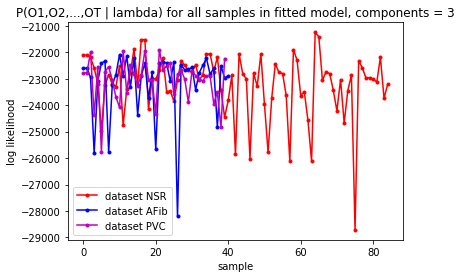

In [19]:
plt.plot(score_NSR[:], ".-", label="dataset NSR", color = 'r')
plt.plot(score_AFib[:], ".-", label="dataset AFib", color = 'b')
plt.plot(score_PVC[:], ".-", label="dataset PVC", color = 'm')
plt.xlabel("sample")
plt.ylabel("log likelihood")
#plt.yscale("symlog")
plt.title("P(O1,O2,...,OT | lambda) for all samples in fitted model, components = 3")
plt.legend()
plt.savefig('ECGSscore.png', dpi=2000)
plt.show

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


<function matplotlib.pyplot.show(*args, **kw)>

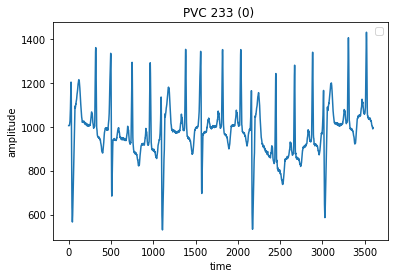

In [11]:
data_NSR105m_train = sio.loadmat(datapath_NSR + '/' + '105m '+ '(0).mat')['val'][0][1:] - sio.loadmat(datapath_NSR + '/' + '105m '+ '(0).mat')['val'][0][:-1]
data_NSR105m_train_len = [len(data_NSR105m_train)]
for i in range(1,14):
    data_file = sio.loadmat(datapath_NSR + '/' + '105m '+ '(' + str(i) + ').mat')['val'][0]
    data_NSR105m_train = np.concatenate([data_NSR105m_train, (data_file[1:] - data_file[:-1])])
    data_NSR105m_train_len.append(len(data_file)-1)
plt.plot(sio.loadmat(datapath_NSR + '/' + '105m '+ '(0).mat')['val'][0])
plt.xlabel("time")
plt.ylabel("amplitude")
#plt.yscale("symlog")
plt.title("NSR 105m (0) ")
plt.savefig('NSR_105.png', dpi=2000)
plt.legend()
plt.cla()

plt.plot(sio.loadmat(datapath_AFib + '/' + '221m '+ '(0).mat')['val'][0])
plt.xlabel("time")
plt.ylabel("amplitude")
#plt.yscale("symlog")
plt.title("AFib 221m (0) ")
plt.savefig('AFib_221.png', dpi=2000)
plt.legend()
plt.cla()

plt.plot(sio.loadmat(datapath_PVC + '/' + '233m '+ '(0).mat')['val'][0])
plt.xlabel("time")
plt.ylabel("amplitude")
#plt.yscale("symlog")
plt.title("PVC 233 (0) ")
plt.savefig('PVC_233.png', dpi=2000)
plt.legend()
plt.show

In [12]:
#train hmm for ECG dataset 105m
ECG_HMM_105m = hmm.GMMHMM(n_components=9, n_mix=3, covariance_type='full', n_iter=10)
ECG_HMM_105m.fit(data_NSR105m_train.reshape(-1,1), lengths = data_NSR105m_train_len)

C:\ProgramData\Anaconda3\lib\site-packages\hmmlearn\hmm.py:663: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans.fit(X[np.where(labels == label)])


GMMHMM(algorithm='viterbi', covariance_type='full',
       covars_prior=array([[[[0.]],

        [[0.]],

        [[0.]]],


       [[[0.]],

        [[0.]],

        [[0.]]],


       [[[0.]],

        [[0.]],

        [[0.]]],


       [[[0.]],

        [[0.]],

        [[0.]]],


       [[[0.]],

        [[0.]],

        [[0.]]],


       [[[0.]],

        [[0.]],

        [[0.]]],


       [[[0.]],

        [[0.]],

        [[0.]]],


       [[[0.]],

        [[0.]],

        [[0.]]],


       [[[0.]],

        [[0.]],

        [[0.]]]]),
       covars_weight=array([[-3., -3., -3.],
       [-3., -3., -3.],
       [-3., -3., -3.],
       [-3., -3....
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]]),
       min_covar=0.001, n_components=9, n_iter=10, n_mix=3, params='stmcw',
       random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
       verbose=

<function matplotlib.pyplot.show(*args, **kw)>

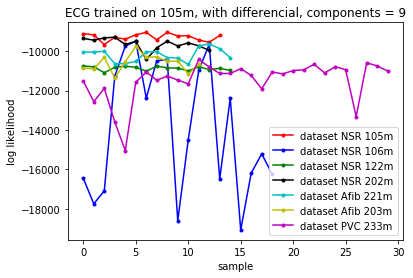

In [13]:
score_105m = []
for i in range(len(data_NSR105m_train_len)):
    data = data_NSR105m_train[i*data_NSR105m_train_len[i]:(i + 1)*data_NSR105m_train_len[i]]
    score_105m.append(ECG_HMM_105m.score(data.reshape(-1, 1)))
    #print(ECG_HMM.score(data.reshape(-1, 1)))
#print("---------------")
score_106m = []
for i in range(0,19):
    data_file = sio.loadmat(datapath_NSR + '/' + '106m '+ '(' + str(i) + ').mat')['val'][0]
    score_106m.append(ECG_HMM_105m.score((data_file[1:] - data_file[:-1]).reshape(-1, 1)))
score_122m = []
for i in range(0,15):
    data_file = sio.loadmat(datapath_NSR + '/' + '122m '+ '(' + str(i) + ').mat')['val'][0]
    score_122m.append(ECG_HMM_105m.score((data_file[1:] - data_file[:-1]).reshape(-1, 1)))
score_202m = []
for i in range(0,13):
    data_file = sio.loadmat(datapath_NSR + '/' + '202m '+ '(' + str(i) + ').mat')['val'][0]
    score_202m.append(ECG_HMM_105m.score((data_file[1:] - data_file[:-1]).reshape(-1, 1)))    
score_221m = []
for i in range(0,15):
    data_file = sio.loadmat(datapath_AFib + '/' + '221m '+ '(' + str(i) + ').mat')['val'][0]
    score_221m.append(ECG_HMM_105m.score((data_file[1:] - data_file[:-1]).reshape(-1, 1)))  
score_203m = []
for i in range(0,12):
    data_file = sio.loadmat(datapath_AFib + '/' + '203m '+ '(' + str(i) + ').mat')['val'][0]
    score_203m.append(ECG_HMM_105m.score((data_file[1:] - data_file[:-1]).reshape(-1, 1)))    
score_233m = []
for i in range(0,30):
    data_file = sio.loadmat(datapath_PVC + '/' + '233m '+ '(' + str(i) + ').mat')['val'][0]
    score_233m.append(ECG_HMM_105m.score((data_file[1:] - data_file[:-1]).reshape(-1, 1))) 

plt.plot(score_105m[:], ".-", label="dataset NSR 105m", color = 'r')
plt.plot(score_106m[:], ".-", label="dataset NSR 106m", color = 'b')
plt.plot(score_122m[:], ".-", label="dataset NSR 122m", color = 'g')
plt.plot(score_202m[:], ".-", label="dataset NSR 202m", color = 'k')
plt.plot(score_221m[:], ".-", label="dataset Afib 221m", color = 'c')
plt.plot(score_203m[:], ".-", label="dataset Afib 203m", color = 'y')
plt.plot(score_233m[:], ".-", label="dataset PVC 233m", color = 'm')

plt.xlabel("sample")
plt.ylabel("log likelihood")
#plt.yscale("symlog")
plt.title("ECG trained on 105m, with differencial, components = 9")
plt.legend()
plt.savefig('ECGSscore_diff.png', dpi=2000)
plt.show

In [14]:

data_NSR105m_train = sio.loadmat(datapath_NSR + '/' + '105m '+ '(0).mat')['val'][0]
data_NSR105m_train_len = [len(data_NSR105m_train)]
for i in range(1,14):
    data_file = sio.loadmat(datapath_NSR + '/' + '105m '+ '(' + str(i) + ').mat')['val'][0]
    data_NSR105m_train = np.concatenate([data_NSR105m_train, data_file])
    data_NSR105m_train_len.append(len(data_file))

In [15]:
#train hmm for ECG dataset 105m
ECG_HMM_105m = hmm.GMMHMM(n_components=9, n_mix=3, covariance_type='full', n_iter=10)
ECG_HMM_105m.fit(data_NSR105m_train.reshape(-1,1), lengths = data_NSR105m_train_len)

GMMHMM(algorithm='viterbi', covariance_type='full',
       covars_prior=array([[[[0.]],

        [[0.]],

        [[0.]]],


       [[[0.]],

        [[0.]],

        [[0.]]],


       [[[0.]],

        [[0.]],

        [[0.]]],


       [[[0.]],

        [[0.]],

        [[0.]]],


       [[[0.]],

        [[0.]],

        [[0.]]],


       [[[0.]],

        [[0.]],

        [[0.]]],


       [[[0.]],

        [[0.]],

        [[0.]]],


       [[[0.]],

        [[0.]],

        [[0.]]],


       [[[0.]],

        [[0.]],

        [[0.]]]]),
       covars_weight=array([[-3., -3., -3.],
       [-3., -3., -3.],
       [-3., -3., -3.],
       [-3., -3....
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]]),
       min_covar=0.001, n_components=9, n_iter=10, n_mix=3, params='stmcw',
       random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
       verbose=

<function matplotlib.pyplot.show(*args, **kw)>

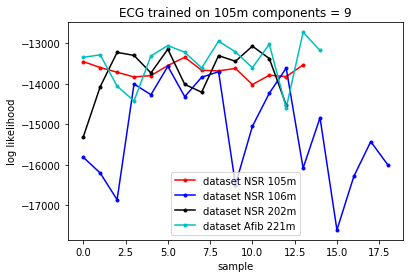

In [20]:
score_105m = []
for i in range(len(data_NSR105m_train_len)):
    data = data_NSR105m_train[i*data_NSR105m_train_len[i]:(i + 1)*data_NSR105m_train_len[i]]
    score_105m.append(ECG_HMM_105m.score(data.reshape(-1, 1)))
    #print(ECG_HMM.score(data.reshape(-1, 1)))
#print("---------------")
score_106m = []
for i in range(0,19):
    data_file = sio.loadmat(datapath_NSR + '/' + '106m '+ '(' + str(i) + ').mat')['val'][0]
    score_106m.append(ECG_HMM_105m.score(data_file.reshape(-1, 1)))
score_122m = []
for i in range(0,15):
    data_file = sio.loadmat(datapath_NSR + '/' + '122m '+ '(' + str(i) + ').mat')['val'][0]
    score_122m.append(ECG_HMM_105m.score(data_file.reshape(-1, 1)))
score_202m = []
for i in range(0,13):
    data_file = sio.loadmat(datapath_NSR + '/' + '202m '+ '(' + str(i) + ').mat')['val'][0]
    score_202m.append(ECG_HMM_105m.score(data_file.reshape(-1, 1)))    
score_221m = []
for i in range(0,15):
    data_file = sio.loadmat(datapath_AFib + '/' + '221m '+ '(' + str(i) + ').mat')['val'][0]
    score_221m.append(ECG_HMM_105m.score(data_file.reshape(-1, 1)))  
score_203m = []
for i in range(0,12):
    data_file = sio.loadmat(datapath_AFib + '/' + '203m '+ '(' + str(i) + ').mat')['val'][0]
    score_203m.append(ECG_HMM_105m.score(data_file.reshape(-1, 1)))    
score_233m = []
for i in range(0,30):
    data_file = sio.loadmat(datapath_PVC + '/' + '233m '+ '(' + str(i) + ').mat')['val'][0]
    score_233m.append(ECG_HMM_105m.score(data_file.reshape(-1, 1))) 

plt.plot(score_105m[:], ".-", label="dataset NSR 105m", color = 'r')
plt.plot(score_106m[:], ".-", label="dataset NSR 106m", color = 'b')
#plt.plot(score_122m[:], ".-", label="dataset NSR 122m", color = 'g')
plt.plot(score_202m[:], ".-", label="dataset NSR 202m", color = 'k')
plt.plot(score_221m[:], ".-", label="dataset Afib 221m", color = 'c')
#plt.plot(score_203m[:], ".-", label="dataset Afib 203m", color = 'y')
#plt.plot(score_233m[:], ".-", label="dataset PVC 233m", color = 'm')

plt.xlabel("sample")
plt.ylabel("log likelihood")
#plt.yscale("symlog")
plt.title("ECG trained on 105m components = 9")
plt.legend()
plt.savefig('ECGSscore.png', dpi=2000)
plt.show

[83.42245989304813, 82.61253309796999, 82.89094979213303, 83.72093023255813, 84.1222288795686, 83.85635716596572, 82.99711815561957, 83.24933293803734, 82.7098674521355, 83.47205707491084, 83.67103694874851, 84.1726618705036, 83.32344213649851, 82.68551236749119]
[142.10526315789474, 79.82753310748383, 70.4626334519573, 64.61262339216273, 72.82535401213755, 61.98979591836734, 62.40970817682752, 64.7568287808128, 58.6248492159228, 73.5376044568245, 58.51896447922938, 131.70731707317074, 120.55813953488372, 58.37837837837838, 59.83379501385041, 67.75407779171894, 70.61131088591043, 66.50246305418719, 66.52294425623651]
[90.4847396768402, 86.94652098907417, 89.4939331163066, 85.89782808198225, 85.81907090464549, 84.07185628742515, 87.65217391304348, 86.69342389626428, 85.95793064241047, 87.69519050593378, 86.25213918996008, 83.69597615499255, 81.84401641932428, 85.7629041406693, 87.83234282139505]
[53.316877506942305, 52.87637698898409, 54.27135678391961, 54.08450704225352, 56.28664495114

C:\ProgramData\Anaconda3\lib\site-packages\numpy\ma\core.py:5216: RuntimeWarning: Mean of empty slice.
  dtype=dtype, **kwargs)[()]
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\interpolate\fitpack2.py:232: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


[115.10971786833855, 119.1906805640711, 111.84891867194636, 122.72727272727272, 122.23701731025301, 124.21725239616615, 114.79185119574844, 119.0447030006124, 125.92819883399817, 118.47575057736721, 126.47149460708783, 116.4420485175202, 117.00270839602769, 122.32488822652756, 122.32488822652756, 117.00270839602771, 120.45788083357793, 108.68835961086883, 126.20508326029798, 111.44792002579813]


<function matplotlib.pyplot.show(*args, **kw)>

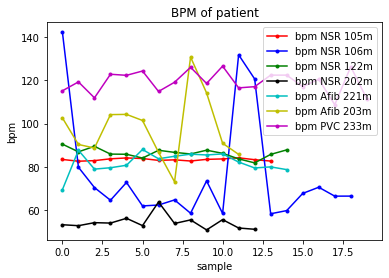

In [17]:
import heartpy
beat_rate_105 = []
for i in range(0,14):
    beat_rate_105.append(heartpy.process(sio.loadmat(datapath_NSR + '/' + '105m '+ '(' + str(i) + ').mat')['val'][0], 360)[-1]['bpm'])
print(beat_rate_105)

beat_rate_106 = []
for i in range(0,19):
    beat_rate_106.append(heartpy.process(sio.loadmat(datapath_NSR + '/' + '106m '+ '(' + str(i) + ').mat')['val'][0], 360)[-1]['bpm'])
print(beat_rate_106)

beat_rate_122 = []
for i in range(0,15):
    beat_rate_122.append(heartpy.process(sio.loadmat(datapath_NSR + '/' + '122m '+ '(' + str(i) + ').mat')['val'][0], 360)[-1]['bpm'])
print(beat_rate_122)

beat_rate_202 = []
for i in range(0,13):
    beat_rate_202.append(heartpy.process(sio.loadmat(datapath_NSR + '/' + '202m '+ '(' + str(i) + ').mat')['val'][0], 360)[-1]['bpm'])
print(beat_rate_202)

beat_rate_221 = []
for i in range(0,15):
    beat_rate_221.append(heartpy.process(sio.loadmat(datapath_AFib + '/' + '221m '+ '(' + str(i) + ').mat')['val'][0], 360)[-1]['bpm'])
print(beat_rate_221)

beat_rate_203 = []
for i in range(0,12):
    beat_rate_203.append(heartpy.process(sio.loadmat(datapath_AFib + '/' + '203m '+ '(' + str(i) + ').mat')['val'][0], 360)[-1]['bpm'])
print(beat_rate_203)

beat_rate_233 = []
for i in range(0,20):
    beat_rate_233.append(heartpy.process(sio.loadmat(datapath_PVC + '/' + '233m '+ '(' + str(i) + ').mat')['val'][0], 360)[-1]['bpm'])
print(beat_rate_233)

plt.plot(beat_rate_105[:], ".-", label="bpm NSR 105m", color = 'r')
plt.plot(beat_rate_106[:], ".-", label="bpm NSR 106m", color = 'b')
plt.plot(beat_rate_122[:], ".-", label="bpm NSR 122m", color = 'g')
plt.plot(beat_rate_202[:], ".-", label="bpm NSR 202m", color = 'k')
plt.plot(beat_rate_221[:], ".-", label="bpm Afib 221m", color = 'c')
plt.plot(beat_rate_203[:], ".-", label="bpm Afib 203m", color = 'y')
plt.plot(beat_rate_233[:], ".-", label="bpm PVC 233m", color = 'm')

plt.xlabel("sample")
plt.ylabel("bpm")
#plt.yscale("symlog")
plt.title("BPM of patient")
plt.legend()
plt.savefig('bpm.png', dpi=2000)
plt.show

In [18]:
data_NSR106m_train = sio.loadmat(datapath_NSR + '/' + '106m '+ '(0).mat')['val'][0][1:] - sio.loadmat(datapath_NSR + '/' + '106m '+ '(0).mat')['val'][0][:-1]
data_NSR106m_train_len = [len(data_NSR106m_train)]
for i in range(1,19):
    data_file = sio.loadmat(datapath_NSR + '/' + '106m '+ '(' + str(i) + ').mat')['val'][0]
    data_NSR106m_train = np.concatenate([data_NSR106m_train, (data_file[1:] - data_file[:-1])])
    data_NSR106m_train_len.append(len(data_file)-1)
ECG_HMM_106m = hmm.GMMHMM(n_components=9, n_mix=3, covariance_type='full', n_iter=10)
ECG_HMM_106m.fit(data_NSR106m_train.reshape(-1,1), lengths = data_NSR106m_train_len)

GMMHMM(algorithm='viterbi', covariance_type='full',
       covars_prior=array([[[[0.]],

        [[0.]],

        [[0.]]],


       [[[0.]],

        [[0.]],

        [[0.]]],


       [[[0.]],

        [[0.]],

        [[0.]]],


       [[[0.]],

        [[0.]],

        [[0.]]],


       [[[0.]],

        [[0.]],

        [[0.]]],


       [[[0.]],

        [[0.]],

        [[0.]]],


       [[[0.]],

        [[0.]],

        [[0.]]],


       [[[0.]],

        [[0.]],

        [[0.]]],


       [[[0.]],

        [[0.]],

        [[0.]]]]),
       covars_weight=array([[-3., -3., -3.],
       [-3., -3., -3.],
       [-3., -3., -3.],
       [-3., -3....
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]]),
       min_covar=0.001, n_components=9, n_iter=10, n_mix=3, params='stmcw',
       random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
       verbose=

<function matplotlib.pyplot.show(*args, **kw)>

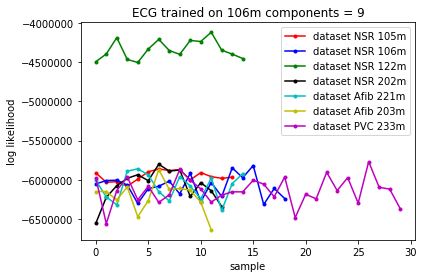

In [19]:
score_105m = []
for i in range(0,14):
    data_file = sio.loadmat(datapath_NSR + '/' + '105m '+ '(' + str(i) + ').mat')['val'][0]
    score_105m.append(ECG_HMM_106m.score(data_file.reshape(-1, 1)))
    #print(ECG_HMM.score(data.reshape(-1, 1)))
#print("---------------")
score_106m = []
for i in range(0,19):
    data_file = sio.loadmat(datapath_NSR + '/' + '106m '+ '(' + str(i) + ').mat')['val'][0]
    score_106m.append(ECG_HMM_106m.score(data_file.reshape(-1, 1)))
score_122m = []
for i in range(0,15):
    data_file = sio.loadmat(datapath_NSR + '/' + '122m '+ '(' + str(i) + ').mat')['val'][0]
    score_122m.append(ECG_HMM_106m.score(data_file.reshape(-1, 1)))
score_202m = []
for i in range(0,13):
    data_file = sio.loadmat(datapath_NSR + '/' + '202m '+ '(' + str(i) + ').mat')['val'][0]
    score_202m.append(ECG_HMM_106m.score(data_file.reshape(-1, 1)))    
score_221m = []
for i in range(0,15):
    data_file = sio.loadmat(datapath_AFib + '/' + '221m '+ '(' + str(i) + ').mat')['val'][0]
    score_221m.append(ECG_HMM_106m.score(data_file.reshape(-1, 1)))  
score_203m = []
for i in range(0,12):
    data_file = sio.loadmat(datapath_AFib + '/' + '203m '+ '(' + str(i) + ').mat')['val'][0]
    score_203m.append(ECG_HMM_106m.score(data_file.reshape(-1, 1)))    
score_233m = []
for i in range(0,30):
    data_file = sio.loadmat(datapath_PVC + '/' + '233m '+ '(' + str(i) + ').mat')['val'][0]
    score_233m.append(ECG_HMM_106m.score(data_file.reshape(-1, 1))) 

plt.plot(score_105m[:], ".-", label="dataset NSR 105m", color = 'r')
plt.plot(score_106m[:], ".-", label="dataset NSR 106m", color = 'b')
plt.plot(score_122m[:], ".-", label="dataset NSR 122m", color = 'g')
plt.plot(score_202m[:], ".-", label="dataset NSR 202m", color = 'k')
plt.plot(score_221m[:], ".-", label="dataset Afib 221m", color = 'c')
plt.plot(score_203m[:], ".-", label="dataset Afib 203m", color = 'y')
plt.plot(score_233m[:], ".-", label="dataset PVC 233m", color = 'm')

plt.xlabel("sample")
plt.ylabel("log likelihood")
#plt.yscale("symlog")
plt.title("ECG trained on 106m components = 9")
plt.legend()
plt.savefig('ECGSscore_106.png', dpi=2000)
plt.show

In [22]:
print(abs(fft.fft(sio.loadmat(datapath_PVC + '/' + file)['val'][0])))

[3609256.           39359.73192205    8938.94306709 ...    5015.35126478
    8938.94306709   39359.73192205]
